In [3]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from dateutil import relativedelta

In [21]:
sales_data=pd.read_csv("F:\Python Prac\sales_data_sample.csv",usecols=["ORDERNUMBER","SALES","ORDERDATE","YEAR_ID",\
                                                                       "PRODUCTCODE","CITY","COUNTRY",\
                                                                       "POSTALCODE"],parse_dates=['ORDERDATE'])

In [22]:
sales_data

,ORDERNUMBER,SALES,ORDERDATE,YEAR_ID,PRODUCTCODE,CITY,POSTALCODE,COUNTRY
0,10107,2871.00,2003-02-24,2003,S10_1678,NYC,10022,USA
1,10121,2765.90,2003-05-07,2003,S10_1678,Reims,51100,France
2,10134,3884.34,2003-07-01,2003,S10_1678,Paris,75508,France
3,10145,3746.70,2003-08-25,2003,S10_1678,Pasadena,90003,USA
4,10159,5205.27,2003-10-10,2003,S10_1678,San Francisco,NaN,USA
...,...,...,...,...,...,...,...,...
2818,10350,2244.40,2004-12-02,2004,S72_3212,Madrid,28034,Spain
2819,10373,3978.51,2005-01-31,2005,S72_3212,Oulu,90110,Finland
2820,10386,5417.57,2005-03-01,2005,S72_3212,Madrid,28034,Spain
2821,10397,2116.16,2005-03-28,2005,S72_3212,Toulouse,31000,France


In [23]:
step1=sales_data['YEAR_ID'].isin([2003,2004])
step2=sales_data['PRODUCTCODE'].isin(['S18_1749','S10_1949','S10_4698','S700_1691','S50_1514'])
tuned_df=sales_data[step1 & step2]
print("unique elements :",np.unique(tuned_df.PRODUCTCODE))
print(tuned_df['PRODUCTCODE'].value_counts())

unique elements : ['S10_1949' 'S10_4698' 'S18_1749' 'S50_1514' 'S700_1691']
S10_1949     23
S50_1514     22
S10_4698     21
S700_1691    21
S18_1749     18
Name: PRODUCTCODE, dtype: int64


In [24]:
tuned_df

,ORDERNUMBER,SALES,ORDERDATE,YEAR_ID,PRODUCTCODE,CITY,POSTALCODE,COUNTRY
26,10103,5404.62,2003-01-29,2003,S10_1949,Stavern,4110,Norway
27,10112,7209.11,2003-03-24,2003,S10_1949,Lule,S-958 22,Sweden
28,10126,7329.06,2003-05-28,2003,S10_1949,Madrid,28023,Spain
29,10140,7374.10,2003-07-24,2003,S10_1949,Burlingame,94217,USA
30,10150,10993.50,2003-09-19,2003,S10_1949,Singapore,79903,Singapore
...,...,...,...,...,...,...,...,...
2499,10316,2795.14,2004-11-01,2004,S700_1691,Cowes,PO31 7PJ,UK
2500,10328,2762.10,2004-11-12,2004,S700_1691,Bergamo,24100,Italy
2501,10340,2658.00,2004-11-24,2004,S700_1691,Barcelona,8022,Spain
2502,10353,5043.87,2004-12-04,2004,S700_1691,Glendale,97561,USA


In [25]:
#tuned_df["ORDERDATE"]=pd.to_datetime(tuned_df.ORDERDATE).astype('datetime64[ns]')
tuned_df['YEAR_ID']=tuned_df['YEAR_ID']+16
tuned_df['ORDERDATE']=tuned_df['ORDERDATE']+pd.offsets.DateOffset(years=16)
#tuned_df["ORDERDATE"]=pd.to_datetime(tuned_df.ORDERDATE).dt.strftime("%d-%m-%Y")

<ipython-input-25-7ddf88fdfa82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuned_df['YEAR_ID']=tuned_df['YEAR_ID']+16
<ipython-input-25-7ddf88fdfa82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuned_df['ORDERDATE']=tuned_df['ORDERDATE']+pd.offsets.DateOffset(years=16)


In [9]:
tuned_df.dtypes

ORDERNUMBER             int64
SALES                 float64
ORDERDATE      datetime64[ns]
YEAR_ID                 int64
PRODUCTCODE            object
CITY                   object
POSTALCODE             object
COUNTRY                object
dtype: object

In [10]:
#tuned_df['MONTH']=tuned_df['ORDERDATE'].dt.strftime('%B')

In [11]:
#tuned_df.groupby(tuned_df['MONTH'])['SALES'].sum().sort_values()

In [12]:
#tuned_df.set_index(['ORDERDATE'],inplace=True)
#monthly = tuned_df.SALES.resample('Q').sum()

In [26]:
tuned_df1=tuned_df[['ORDERDATE','SALES']]

In [27]:
monthly=tuned_df1.groupby(pd.Grouper(key='ORDERDATE', freq='M')).sum()
yearly=tuned_df1.groupby(pd.Grouper(key='ORDERDATE', freq='Y')).sum()
quarterly=tuned_df1.groupby(pd.Grouper(key='ORDERDATE', freq='Q')).sum()

In [28]:
monthly

,SALES
ORDERDATE,
2019-01-31,12261.54
2019-02-28,9378.52
2019-03-31,13278.11
2019-04-30,14162.14
2019-05-31,10185.06
2019-06-30,5042.88
2019-07-31,14398.08
2019-08-31,11213.52
2019-09-30,18148.61


In [29]:
quarterly

,SALES
ORDERDATE,
2019-03-31,34918.17
2019-06-30,29390.08
2019-09-30,43760.21
2019-12-31,121695.21
2020-03-31,48566.58
2020-06-30,55738.99
2020-09-30,64620.90
2020-12-31,117946.03


In [30]:
yearly

,SALES
ORDERDATE,
2019-12-31,229763.67
2020-12-31,286872.50


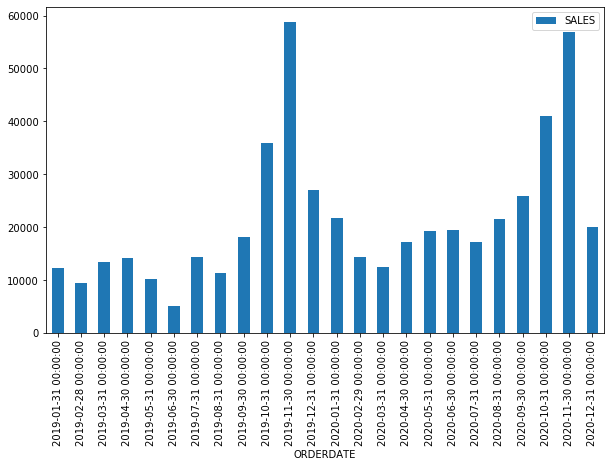

In [31]:
monthly.plot(kind='bar',figsize=(10,6))

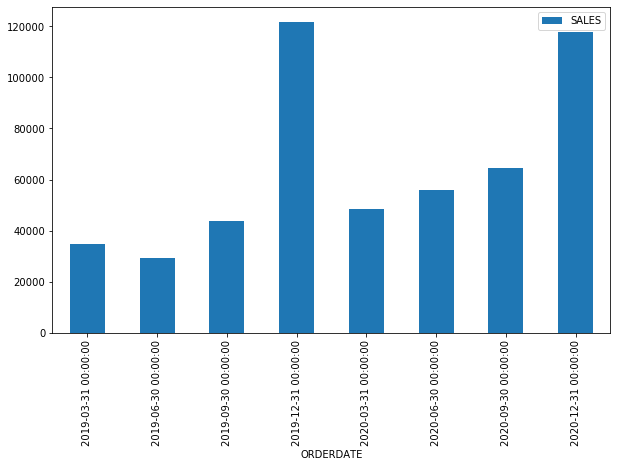

In [32]:
quarterly.plot(kind='bar',figsize=(10,6))

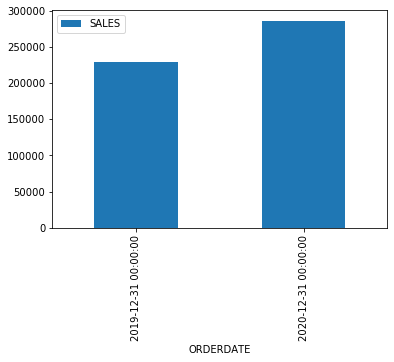

In [33]:
yearly.plot(kind='bar')